In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
#setting default figure size for plots
matplotlib.rcParams["figure.figsize"]=(20,10)

In [3]:
#reading data file
df1=pd.read_csv('C:/Users/namra/Downloads/Bengaluru_House_Data.csv')

In [4]:
df1

area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0   39.07  
1      4 Bedroom  Theanmp       2600   5.0      3.0  120.00  
2          3 BHK      NaN       1440   2.0      3.0   62.00  
3          3 BHK  Soiewre       1521   3.0      1.0   95.00  
4          2 BHK      NaN       1200   2.0      1.0   51.00  
...          ...      ...        ...   ...      ...     ...  
13315  5 Bedroom  ArsiaEx       3453   4.0      0.0  231.00  
13316      4 BHK      NaN       3600   5.0      NaN  400.00  
13317      2 BHK  Mahla T       1141   2.0      1.0   60.00  
13318      4 BHK  SollyCl       4689   4.0      1.0  488.00  
13319      1 BHK      NaN        550   1.0      1.0   17.00  

[13320 rows x 9 columns]

In [5]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
#for simplicity we are dropping availability,society,area_type,balcony columns as they do not provide any additional value to our results i.e price
df2=df1.drop(['area_type','society','availability','balcony'],axis=1)

In [7]:
df2.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [8]:
#data cleaning process.since na values are less compared to dataset size we can drop na

df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
#exploring size feature because values are inconsistent

df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
#creating new column bhk with only numerical value of the number of bhk
df3['bhk']=df3['size'].apply(lambda x : int(x.split(' ')[0]))
df3.head()

<ipython-input-11-36b0cad78e28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x : int(x.split(' ')[0]))


location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [12]:
#outlier detection
df3[df3.bhk>20]

location        size total_sqft  bath  price  bhk
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

In [13]:
#checking total_sqft feature(some values are integers and some are ranges so we need to equalise it)
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
#creating a function to return float values for integers or false for range of numbers

def is_float(x):
    try :
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

location       size      total_sqft  bath    price  bhk
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4

In [16]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
               
    try:
               
             return float(x)
    except:
               return None


In [17]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)

In [18]:
df4.iloc[410]

location      Kanakpura Road
size                   3 BHK
total_sqft            1550.0
bath                     3.0
price                   64.5
bhk                        3
Name: 414, dtype: object

In [19]:
df5=df4.copy()

In [20]:
#feature engineering(creating a price per sqft column for outlier detection)

df5['price_per_sqft']=df5.price*100000/df5['total_sqft']

In [21]:


df5.head()


location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [22]:
len(df5.location.unique())

1304

In [23]:
#1 we are removing blank spaces
#2 we are checking count of no of houses in each location
df5.location=df5.location.apply(lambda x : x.strip())
loc_stats=df5.groupby('location')['location'].count().sort_values(ascending=False)

pd.set_option("display.max_rows",None)
loc_stats

location
Whitefield                                            535
Sarjapur  Road                                        392
Electronic City                                       304
Kanakpura Road                                        266
Thanisandra                                           236
Yelahanka                                             210
Uttarahalli                                           186
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           150
7th Phase JP Nagar                                    149
Haralur Road                                          141
Electronic City Phase II                              131
Rajaji Nagar                                          106
Chandapura                                             98
Bella

In [24]:
len(loc_stats[loc_stats<=10])

1052

In [25]:
loc_stats_less_than_10=loc_stats[loc_stats<=10]

In [26]:
#replacing locations with less than 10 datapoint sas others
df5.location=df5.location.apply(lambda x : 'other' if x in loc_stats_less_than_10 else x)

In [27]:
len(df5.location.unique())

242

In [28]:
#outlier detection and removal
#every bedroom should have a minimum threshold value.here we assume min bedroom sqft is 300

df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [29]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [30]:
#creating a fucntion to premve price per sqft outliers

def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
                          
    return df_out

df7=remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [31]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3 bhk',s=50,marker='+')
    plt.xlabel('tot sqft')
    plt.ylabel('price')
    plt.title('location')
    plt.legend()
    
   

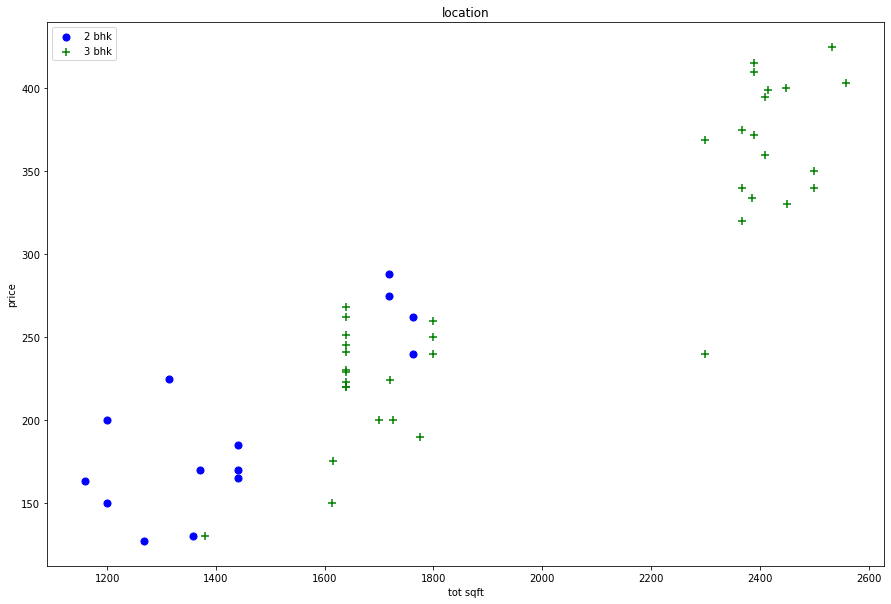

In [32]:
plot_scatter_chart(df7,"Rajaji Nagar")

In [33]:
def remove_bhk_outliers(df):
    '''this is a function to remove bhk outliers where cost of bhk is lower than mean of bhk-1'''
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [34]:
df8=remove_bhk_outliers(df7)
df8.shape

(7329, 7)

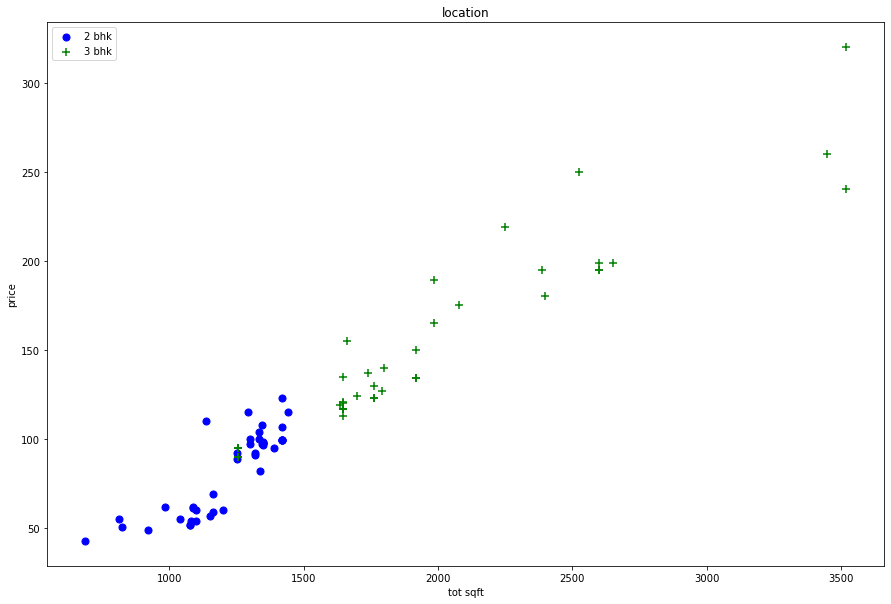

In [35]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'count')

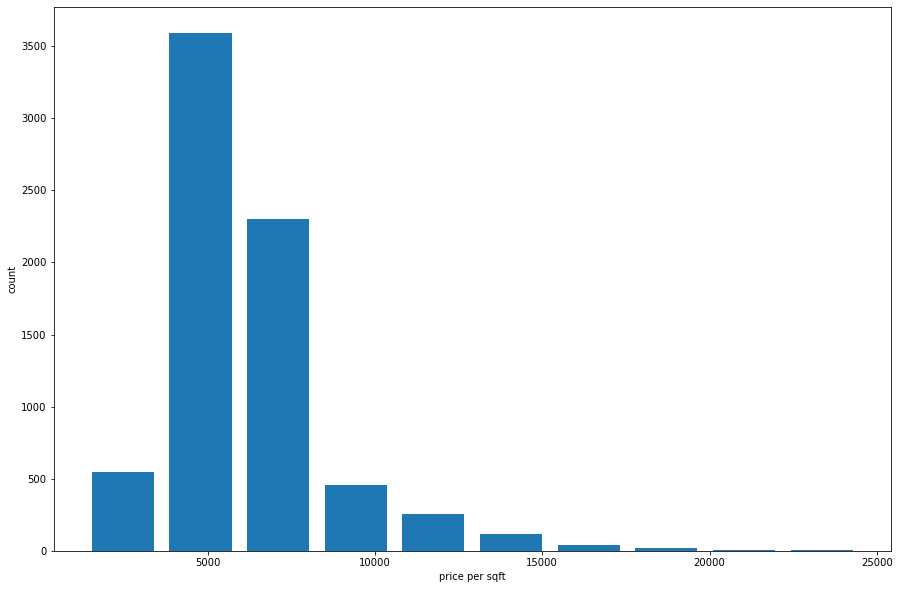

In [36]:
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("price per sqft")
plt.ylabel("count")

In [37]:
#exploring bath columns
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

(array([4.766e+03, 1.763e+03, 6.780e+02, 8.100e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

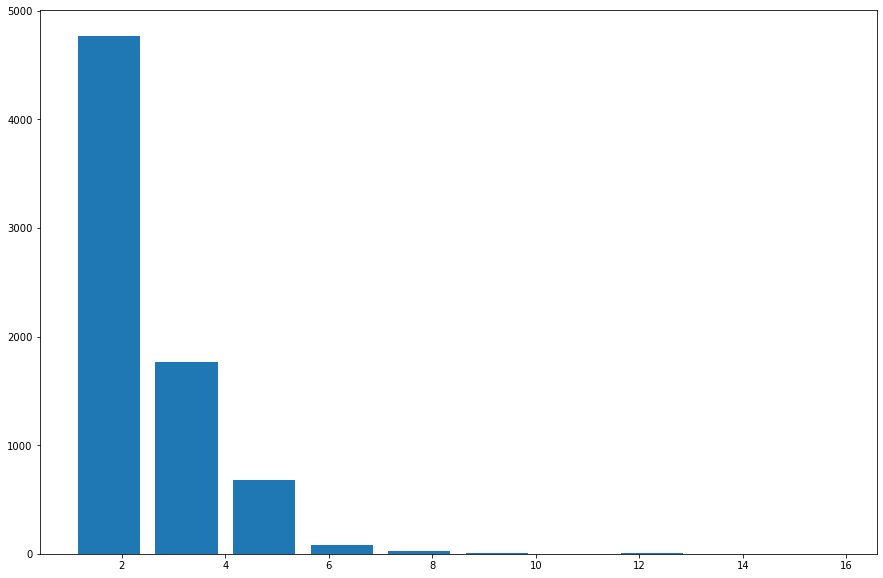

In [38]:
plt.hist(df8.bath,rwidth=0.8)

In [39]:
#removing data where no of bathroom>no of bhk+2
df9=df8[df8.bath<df8.bhk+2]

In [40]:
df9.shape

(7251, 7)

In [41]:
#dropping size and price per bhk columns

df10=df9.drop(['size','price_per_sqft'],axis=1)

In [42]:
df10.head(3)

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3

In [43]:
dummies=pd.get_dummies(df10.location)

In [44]:
df11=pd.concat([df10,dummies],axis=1).drop('other',axis=1)

In [45]:
df12=df11.drop('location',axis=1)

In [46]:
df12

total_sqft  bath     price  bhk  1st Block Jayanagar  \
0        2850.000   4.0   428.000    4                    1   
1        1630.000   3.0   194.000    3                    1   
2        1875.000   2.0   235.000    3                    1   
3        1200.000   2.0   130.000    3                    1   
4        1235.000   2.0   148.000    2                    1   
5        2750.000   4.0   413.000    4                    1   
6        2450.000   4.0   368.000    4                    1   
8        1875.000   3.0   167.000    3                    0   
9        1500.000   5.0    85.000    5                    0   
10       2065.000   4.0   210.000    3                    0   
12       2059.000   3.0   225.000    3                    0   
13       1394.000   2.0   100.000    2                    0   
14       1077.000   2.0    93.000    2                    0   
15       1566.000   2.0   180.000    2                    0   
16        840.000   2.0    50.000    1                    0   
17       1590.000   3.0   131.000    3                    0   
18       2180.000   3.0   210.000    3                    0   
19       1180.000   2.0    88.500    2                    0   
20       1200.000   2.0    86.000    2                    0   
21       1394.000   2.0    85.000    2                    0   
22       2077.000   3.0   175.000    3                    0   
24       1205.000   2.0    85.000    2                    0   
26        900.000   2.0    75.000    2                    0   
27       1450.000   2.0    50.750    3                    0   
28       1150.000   2.0    40.250    2                    0   
29       1350.000   2.0    47.250    3                    0   
30       1350.000   2.0    47.250    3                    0   
31        900.000   2.0    41.000    2                    0   
32       1681.000   3.0    69.000    3                    0   
33       1350.000   2.0    47.250    3                    0   
34       1150.000   2.0    40.250    2                    0   
35       1500.000   4.0   220.000    4                    0   
38       1350.000   4.0   200.000    4                    0   
39       1200.000   4.0   225.000    4                    0   
40       1500.000   3.0   230.000    4                    0   
41       1206.000   2.0    56.000    2                    0   
42       1270.000   2.0    70.000    3                    0   
43       1312.000   2.0    69.000    2                    0   
44       1100.000   2.0    48.000    2                    0   
45       3600.000   5.0   130.000    5                    0   
46       5100.000   5.0   300.000    6                    0   
47       1075.000   2.0    60.000    2                    0   
48       1150.000   3.0    52.500    2                    0   
49       1256.000   2.0    62.800    2                    0   
50       1207.000   2.0    63.000    2                    0   
51       1725.000   2.0   100.000    3                    0   
52       1440.000   2.0    60.000    2                    0   
53       1700.000   2.0   100.000    3                    0   
55       2500.000   5.0   110.000    5                    0   
56        600.000   1.0    30.000    1                    0   
57       1390.000   2.0    65.000    2                    0   
58       1256.000   2.0    62.800    2                    0   
59       1000.000   2.0    48.000    2                    0   
60       1350.000   2.0    75.000    3                    0   
61        552.000   1.0    23.500    1                    0   
62       1200.000   2.0    51.000    2                    0   
66       1030.000   2.0    57.000    2                    0   
67       1200.000   2.0    68.000    2                    0   
68       1190.000   2.0    61.800    2                    0   
69       4000.000   5.0   170.000    5                    0   
70       1080.000   2.0    53.000    2                    0   
71       1041.000   2.0    54.000    2                    0   
72        812.000   2.0    42.000    2

In [47]:
df12.shape

(7251, 245)

In [92]:
X=df12.drop('price',axis=1)
y=df12.price

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [95]:
from sklearn.linear_model import LinearRegression

In [106]:
#performing linear regression
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874392

In [107]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(), X ,y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [108]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

model  best_score                                 best_params
0  linear_regression    0.818354                        {'normalize': False}
1              lasso    0.687440         {'alpha': 1, 'selection': 'random'}
2      decision_tree    0.741276  {'criterion': 'mse', 'splitter': 'random'}

In [109]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [110]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.49904677211399

In [111]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

86.80519395238203

In [112]:
predict_price('Indira Nagar',1000, 2, 2)

181.27815484006317

In [113]:
predict_price('Indira Nagar',1000, 3, 3)

184.58430202033117

In [114]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [115]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))